In [2]:
# fix python path if working locally
from utils import fix_pythonpath_if_working_locally
fix_pythonpath_if_working_locally()

%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.dataprocessing.transformers import InvertibleMapper
from darts.metrics import mape

In [4]:
df = pd.read_csv('monthly-milk.csv')
series = TimeSeries.from_dataframe(df, 'Month', ['Pounds per cow'])

/opt/anaconda3/envs/darts-dev/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


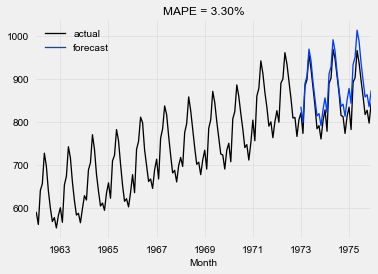

In [5]:
training, validation = series.split_before(pd.Timestamp('1973-01-01'))

model = ExponentialSmoothing()
model.fit(training)
forecast = model.predict(36)

series.plot(label='actual')
forecast.plot(label='forecast')

plt.title('MAPE = {:.2f}%'.format(mape(forecast, validation)))
plt.legend()
plt.show()

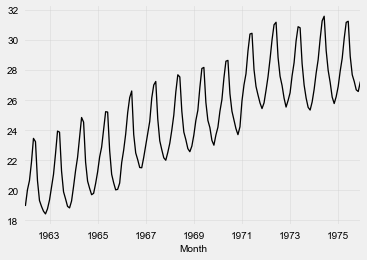

In [6]:
toDailyAverage = InvertibleMapper(fn=lambda timestamp, x: x/timestamp.days_in_month,
                               inverse_fn=lambda timestamp, x: x*timestamp.days_in_month)

dailyAverage = toDailyAverage.transform(series)

dailyAverage.plot()
plt.show()

/opt/anaconda3/envs/darts-dev/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


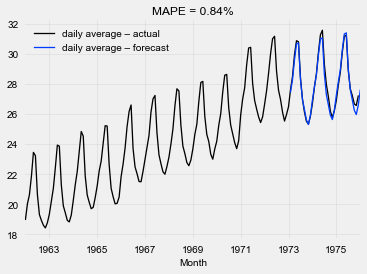

In [7]:
dailyavg_train, dailyavg_val = dailyAverage.split_after(pd.Timestamp('1973-01-01'))

model = ExponentialSmoothing()
model.fit(dailyavg_train)
dailyavg_forecast = model.predict(36)

dailyAverage.plot(label="daily average – actual")
dailyavg_forecast.plot(label="daily average – forecast")

plt.title('MAPE = {:.2f}%'.format(mape(dailyavg_forecast, dailyavg_val)))
plt.legend()
plt.show()

In [8]:
forecast = toDailyAverage.inverse_transform(dailyavg_forecast)

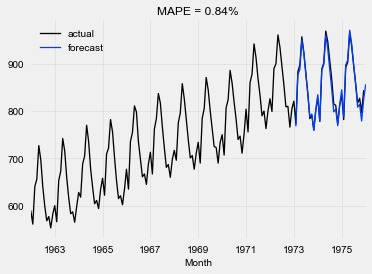

In [9]:
series.plot(label='actual')
forecast.plot(label='forecast')

plt.title('MAPE = {:.2f}%'.format(mape(forecast, validation)))
plt.legend()
plt.show()